# Boston Housing Price Prediction Using Linear Regression

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA.

# Import Libraries

Importing basic libraries such as numpy, pandas, matplotlib and seaborn

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Get the Data

Loading boston housing data from scikit-learn built-in datasets

In [6]:
from sklearn.datasets import load_boston
dataset = load_boston()

Checking the keys of the boston housing dataset

In [7]:
dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

Going through the description of features to learn about dataset

In [8]:
print(dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Converting into Data Frame and checking head of dataset

In [9]:
boston = pd.DataFrame(data =dataset.data, columns = dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Adding target feature to dataset

In [10]:
boston['MEDV'] = dataset.target

In [11]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Checking, is there any null value

In [12]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

# Exploratory Data Analysis

Plotting the distplot of target variable for checking distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


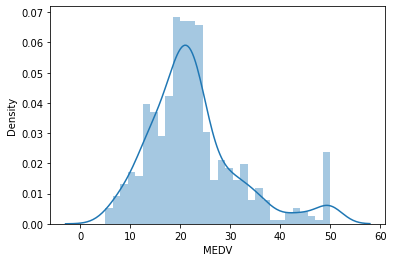

In [15]:
sns.distplot(boston['MEDV'], bins = 30)
plt.show()

Finding Correlation between features

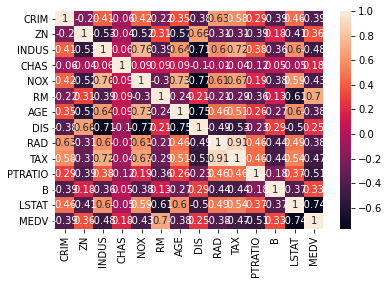

In [17]:
correlation_matrix = boston.corr().round(2)

sns.heatmap(data = correlation_matrix, annot= True)

Plotting RM and LSTAT against target variable MEDV

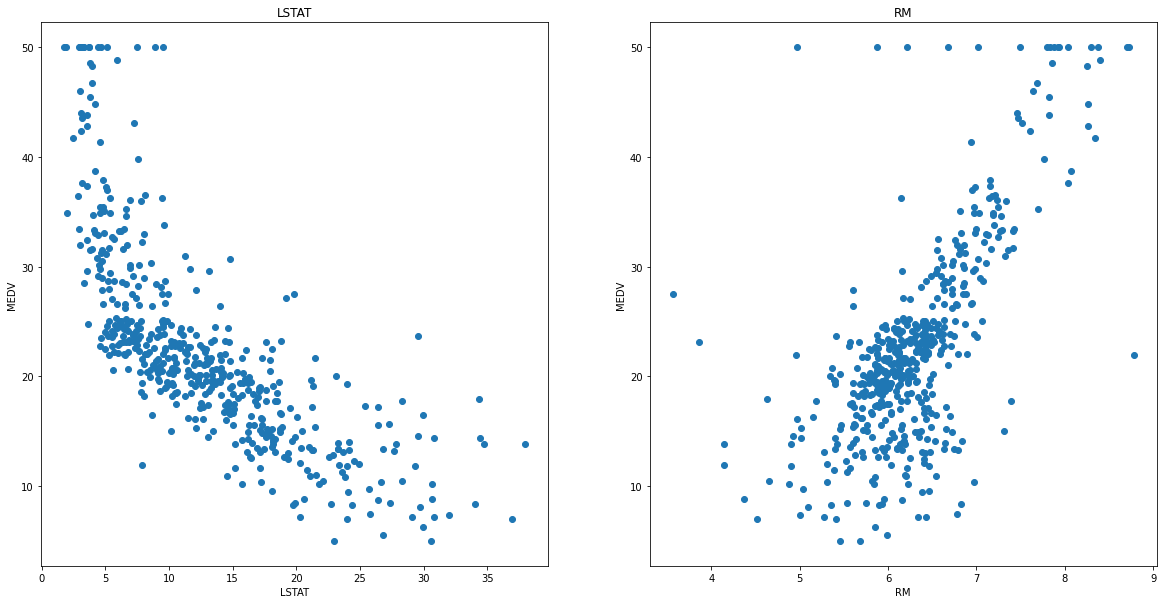

In [18]:
plt.figure(figsize= (20,10))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
  plt.subplot(1, len(features), i+1)
  x = boston[col]
  y = target
  plt.scatter(x,y, marker= 'o')
  plt.title(col)
  plt.xlabel(col)
  plt.ylabel('MEDV')



# Setting Up Data

Choosing LSTAT and RM as features for training and separating features and target variables

In [19]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns= ['LSTAT', 'RM'])
y = boston['MEDV']

# Train Test Split

Spliting into training and testing datasets

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


# Training a Linear Regression Model

Importing and creating Linear Regression object, and fitting on training data

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Evaluating on Training Data

Predicting on training data and finding root mean square error and r2 score

In [25]:
y_train_pred = regressor.predict(X_train)

rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2 = r2_score(y_train, y_train_pred)

print(rmse)
print(r2)

5.637129335071195
0.6300745149331701


# Evaluating on Test Data

Predicting on Test data and finding root mean square error and r2 score

In [27]:
y_test_pred = regressor.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2 = r2_score(y_test, y_test_pred)

print(rmse)
print(r2)

5.137400784702911
0.6628996975186952
